In [7]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
image_size = (224, 224)
batch_size = 32
num_classes = 38  
validation_split = 0.2

In [9]:
train_dir = "train"  
test_dir = "test"

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

Found 17482 images belonging to 38 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 17572 images belonging to 38 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\hp\Downloads\leafdataset\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
opt = Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


In [10]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=32,
        validation_data=test_generator,
        validation_steps=len(test_generator)
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise  # Reraise the exception to get the full traceback                                                                                                        

Epoch 1/32


c:\Users\hp\Downloads\leafdataset\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 1081s 2s/step - accuracy: 0.2026 - loss: 2.9745 - val_accuracy: 0.6461 - val_loss: 1.1842
Epoch 2/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/32


c:\Users\hp\Downloads\leafdataset\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


547/547 ━━━━━━━━━━━━━━━━━━━━ 1092s 2s/step - accuracy: 0.6174 - loss: 1.2549 - val_accuracy: 0.7314 - val_loss: 0.8671
Epoch 4/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 1078s 2s/step - accuracy: 0.7186 - loss: 0.8995 - val_accuracy: 0.7688 - val_loss: 0.7392
Epoch 6/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 1047s 2s/step - accuracy: 0.7847 - loss: 0.6874 - val_accuracy: 0.7914 - val_loss: 0.6645
Epoch 8/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 1066s 2s/step - accuracy: 0.8199 - loss: 0.5689 - val_accuracy: 0.8217 - val_loss: 0.5777
Epoch 10/32
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 77us/step 

In [15]:
# Train the model with error handling
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=60,  # Change this to the desired number of epochs
        validation_data=test_generator,
        validation_steps=len(test_generator)
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise  # Reraise the exception to get the full traceback


Epoch 1/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 1723s 3s/step - accuracy: 0.1944 - loss: 2.9323 - val_accuracy: 0.5863 - val_loss: 1.3447
Epoch 2/60


c:\Users\hp\Downloads\leafdataset\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 960s 2s/step - accuracy: 0.5708 - loss: 1.3887 - val_accuracy: 0.6964 - val_loss: 1.0244
Epoch 4/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 983s 2s/step - accuracy: 0.6944 - loss: 0.9892 - val_accuracy: 0.7619 - val_loss: 0.7642
Epoch 6/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.7621 - loss: 0.7555 - val_accuracy: 0.7695 - val_loss: 0.7486
Epoch 8/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 9

In [59]:
# Train the model with error handling
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,  # Change this to the desired number of epochs
        validation_data=test_generator,
        validation_steps=len(test_generator)
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise  # Reraise the exception to get the full traceback

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 666s 1s/step - accuracy: 0.9545 - loss: 0.1476 - val_accuracy: 0.9079 - val_loss: 0.4174
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 106us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


c:\Users\hp\Downloads\leafdataset\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


547/547 ━━━━━━━━━━━━━━━━━━━━ 493s 898ms/step - accuracy: 0.9588 - loss: 0.1378 - val_accuracy: 0.8424 - val_loss: 0.8623
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.9596 - loss: 0.1398 - val_accuracy: 0.9089 - val_loss: 0.4975
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.9612 - loss: 0.1359 - val_accuracy: 0.9171 - val_loss: 0.4250
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 103us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 996s 2s/step - accuracy: 0.9604 - loss: 0.1587 - val_accuracy: 0.9144 - val_loss: 0.4747
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step -

In [60]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
# Print the accuracy
print("Test Accuracy:", accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 151s 275ms/step - accuracy: 0.9320 - loss: 0.3639
Test Accuracy: 0.9143523573875427


In [69]:
print("Test Accuracy for Custom CNN :", accuracy*100)

Test Accuracy for Custom CNN : 91.43523573875427


In [27]:

model_path = "saved_models/model.keras"
model.save(model_path)
print("Model saved successfully at", model_path)


Model saved successfully at saved_models/model.keras


In [21]:
# Compile the loaded model with desired metrics
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
from keras.models import load_model
# Load the model
model = load_model('saved_models/model.keras')
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\hp\Downloads\leafdataset\.conda\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [31]:
test_dir = 'images_for_test'  

In [39]:
import os

# Your directory or file path
path = r'C:\Users\hp\Downloads\leafdataset\test\Apple___Black_rot\0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE.S 3047_90deg.JPG'

# Check if it's a directory
if os.path.isdir(path):
    print("It's a directory.")
elif os.path.isfile(path):
    print("It's a file.")
else:
    print("It's neither a directory nor a file.")


It's a file.


In [52]:
# Define your class labels
class_labels = {
    0: "Apple___Apple_scab",
    1: "Apple___Black_rot",
    2: "Apple___Cedar_apple_rust",
    3: "Apple___healthy",
    4: "Blueberry___healthy",
    5: "Cherry_(including_sour)___healthy",
    6: "Cherry_(including_sour)___Powdery_mildew",
    7: "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    8: "Corn_(maize)___Common_rust",
    9: "Corn_(maize)___healthy",
    10: "Corn_(maize)___Northern_Leaf_Blight",
    11: "Grape___Black_rot",
    12: "Grape___Esca_(Black_Measles)",
    13: "Grape___healthy",
    14: "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    15: "Orange___Haunglongbing_(Citrus_greening)",
    16: "Peach___Bacterial_spot",
    17: "Peach___healthy",
    18: "Pepper,_bell___Bacterial_spot",
    19: "Pepper,_bell___healthy",
    20: "Potato___Early_blight",
    21: "Potato___healthy",
    22: "Potato___Late_blight",
    23: "Raspberry___healthy",
    24: "Soybean___healthy",
    25: "Squash___Powdery_mildew",
    26: "Strawberry___healthy",
    27: "Strawberry___Leaf_scorch",
    28: "Tomato___Bacterial_spot",
    29: "Tomato___Early_blight",
    30: "Tomato___healthy",
    31: "Tomato___Late_blight",
    32: "Tomato___Leaf_Mold",
    33: "Tomato___Septoria_leaf_spot",
    34: "Tomato___Spider_mites Two-spotted_spider_mite",
    35: "Tomato___Target_Spot",
    36: "Tomato___Tomato_mosaic_virus",
    37: "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
}



In [62]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('saved_models/model.keras')

# File path of the image to test
image_file = r'images_for_test\AppleCedarRust2.JPG'

img = image.load_img(image_file, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [63]:
predicted_label = class_labels.get(predicted_class)

if predicted_label is not None:
    print("Predicted class:", predicted_label)
else:
    print("Unknown class index:", predicted_class)

Predicted class: Apple___Cedar_apple_rust


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get true labels from the test generator
y_true = test_generator.classes

# Assuming your model predicts probabilities for each class
y_prob = model.predict(test_generator)

# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


550/550 ━━━━━━━━━━━━━━━━━━━━ 161s 292ms/step
Precision: 0.9239009893554656
Recall: 0.9203277942180742
F1 Score: 0.919757163335034
Confusion Matrix:
 [[467   7   0 ...   0   0   0]
 [  5 485   0 ...   0   0   0]
 [  0   0 430 ...   0   0   0]
 ...
 [  0   0   0 ... 436   0   0]
 [  0   0   0 ...   0 443   0]
 [  0   0   1 ...   0   0 470]]


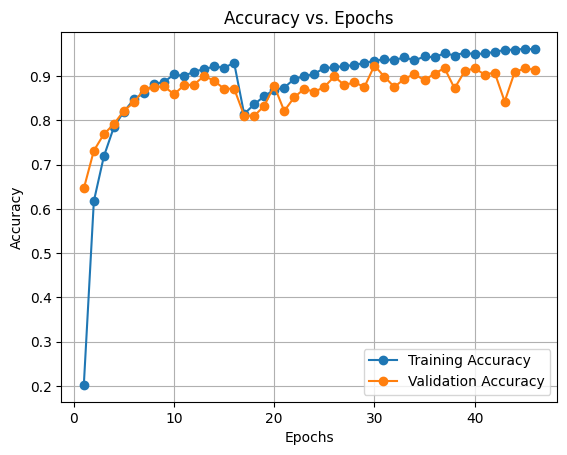

In [77]:
import matplotlib.pyplot as plt

# Define the epoch data
epoch_data = [
    {'accuracy': 0.2026, 'loss': 2.9745, 'val_accuracy': 0.6461, 'val_loss': 1.1842},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.6174, 'loss': 1.2549, 'val_accuracy': 0.7314, 'val_loss': 0.8671},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.7186, 'loss': 0.8995, 'val_accuracy': 0.7688, 'val_loss': 0.7392},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.7847, 'loss': 0.6874, 'val_accuracy': 0.7914, 'val_loss': 0.6645},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8199, 'loss': 0.5689, 'val_accuracy': 0.8217, 'val_loss': 0.5777},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8472, 'loss': 0.4733, 'val_accuracy': 0.8404, 'val_loss': 0.5102},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8620, 'loss': 0.4179, 'val_accuracy': 0.8696, 'val_loss': 0.4159},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8820, 'loss': 0.3603, 'val_accuracy': 0.8747, 'val_loss': 0.3958},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8864, 'loss': 0.3501, 'val_accuracy': 0.8769, 'val_loss': 0.3963},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9036, 'loss': 0.2871, 'val_accuracy': 0.8587, 'val_loss': 0.4797},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9000, 'loss': 0.3113, 'val_accuracy': 0.8791, 'val_loss': 0.4094},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9101, 'loss': 0.2776, 'val_accuracy': 0.8808, 'val_loss': 0.3988},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9153, 'loss': 0.2598, 'val_accuracy': 0.9002, 'val_loss': 0.3235},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9216, 'loss': 0.2401, 'val_accuracy': 0.8895, 'val_loss': 0.3802},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9186, 'loss': 0.2495, 'val_accuracy': 0.8710, 'val_loss': 0.4650},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9298, 'loss': 0.2237, 'val_accuracy': 0.8717, 'val_loss': 0.4394},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8142, 'loss': 0.5835, 'val_accuracy': 0.8107, 'val_loss': 0.61},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8361, 'loss': 0.5031, 'val_accuracy': 0.8099, 'val_loss': 0.63},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8544, 'loss': 0.4386, 'val_accuracy': 0.8325, 'val_loss': 0.5448},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.869, 'loss': 0.4117, 'val_accuracy': 0.8776, 'val_loss': 0.3913},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8736, 'loss': 0.391, 'val_accuracy': 0.8212, 'val_loss': 0.6491},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8937, 'loss': 0.3321, 'val_accuracy': 0.8519, 'val_loss': 0.4851},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8993, 'loss': 0.3139, 'val_accuracy': 0.8712, 'val_loss': 0.4406},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9051, 'loss': 0.2876, 'val_accuracy': 0.8641, 'val_loss': 0.4802},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9178, 'loss': 0.2597, 'val_accuracy': 0.8753, 'val_loss': 0.4326},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9199, 'loss': 0.2479, 'val_accuracy': 0.899, 'val_loss': 0.3336},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9223, 'loss': 0.2453, 'val_accuracy': 0.8795, 'val_loss': 0.4199},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.925, 'loss': 0.2249, 'val_accuracy': 0.8858, 'val_loss': 0.4055},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9294, 'loss': 0.2238, 'val_accuracy': 0.8751, 'val_loss': 0.4584},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9343, 'loss': 0.2102, 'val_accuracy': 0.9237, 'val_loss': 0.2581},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9377, 'loss': 0.1929, 'val_accuracy': 0.8983, 'val_loss': 0.395},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.936, 'loss': 0.201, 'val_accuracy': 0.8753, 'val_loss': 0.487},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9424, 'loss': 0.189, 'val_accuracy': 0.894, 'val_loss': 0.4014},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9352, 'loss': 0.2016, 'val_accuracy': 0.9042, 'val_loss': 0.3474},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9441, 'loss': 0.1753, 'val_accuracy': 0.8904, 'val_loss': 0.4027},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.942, 'loss': 0.1753, 'val_accuracy': 0.9056, 'val_loss': 0.3208},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9517, 'loss': 0.1498, 'val_accuracy': 0.9178, 'val_loss': 0.3063},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9463, 'loss': 0.1673, 'val_accuracy': 0.8722, 'val_loss': 0.5131},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9527, 'loss': 0.1484, 'val_accuracy': 0.9106, 'val_loss': 0.3406},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9494, 'loss': 0.1585, 'val_accuracy': 0.9179, 'val_loss': 0.3269},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9509, 'loss': 0.1498, 'val_accuracy': 0.9031, 'val_loss': 0.3731},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9545, 'loss': 0.1476, 'val_accuracy': 0.9079, 'val_loss': 0.4174},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9588, 'loss': 0.1378, 'val_accuracy': 0.8424, 'val_loss': 0.8623},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9596, 'loss': 0.1398, 'val_accuracy': 0.9089, 'val_loss': 0.4975},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9612, 'loss': 0.1359, 'val_accuracy': 0.9171, 'val_loss': 0.4250},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9604, 'loss': 0.1587, 'val_accuracy': 0.9144, 'val_loss': 0.4747},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0}

]

import matplotlib.pyplot as plt

def plot_accuracy_from_epochs(epoch_data):
    training_accuracy = []
    validation_accuracy = []
    
    for epoch in epoch_data:
        training_acc = epoch['accuracy']
        val_acc = epoch['val_accuracy']
        
        if training_acc != 0.0 and val_acc != 0.0:
            training_accuracy.append(training_acc)
            validation_accuracy.append(val_acc)

    epochs = range(1, len(training_accuracy) + 1)

    plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
    plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')

    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_accuracy_from_epochs(epoch_data)